In [1]:
!pip install python-igraph
!pip install matplotlib
!pip install numpy
!pip install scipy
!pip install easygui
!pip install cairocffi
!pip install pm4py


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import igraph as ig
import easygui
from matplotlib import pyplot as plt
import numpy as np
import scipy
import statistics
import pandas as pd
import pm4py
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

In [68]:
#read data
transactions = pd.read_csv('TRANSACTION1.csv', sep=';')
#event_log = pd.read_csv('eventlog.csv', sep=';')

In [ ]:
#join transactions with event log
network_df = pd.merge(event_log, transactions, left_on=['TID'], right_on=['TID'], how='inner')


In [69]:
#network_df=network_df[network_df["Activity"]=="Settling"]
network_df=transactions
# Grouping by 'FromParticipantId' and 'ToParticipantId' and then summing the 'Value' column
summed_values = network_df.groupby(['FromParticipantId', 'ToParticipantId'])['Value'].sum().reset_index()

# Create a DataFrame containing all possible sender-receiver combinations
senders = network_df['FromParticipantId'].unique()
receivers = network_df['ToParticipantId'].unique()
all_combinations = pd.DataFrame([(sender, receiver) for sender in senders for receiver in receivers], columns=['FromParticipantId', 'ToParticipantId'])

# Left join the summed_values DataFrame with all_combinations DataFrame
summed_values = pd.merge(all_combinations, summed_values, on=['FromParticipantId', 'ToParticipantId'], how='left').fillna(0)
print(network_df)
print(summed_values)

       TID                 Time         Value  FromParticipantId  \
0        1  2024-03-02 00:15:43  1.022036e+08                 11   
1        2  2024-03-02 00:29:57  7.329673e+07                 10   
2        3  2024-03-02 00:31:50  5.141299e+07                  6   
3        4  2024-03-02 01:01:00  1.501531e+08                 10   
4        5  2024-03-02 01:22:22  9.204853e+07                 15   
...    ...                  ...           ...                ...   
2995  2996  2024-03-10 22:13:28  7.493089e+07                  5   
2996  2997  2024-03-10 22:25:38  1.771645e+08                  9   
2997  2998  2024-03-10 22:28:15  4.042613e+07                  6   
2998  2999  2024-03-10 23:36:25  5.016335e+07                  5   
2999  3000  2024-03-10 23:57:16  1.288234e+08                 17   

      FromAccountId  ToParticipantId  ToAccountId  Linkcode  \
0                 4               12            4       713   
1                 0               13            0      12

# 1 edge = 1 transaction

Participant 11 - In-degree: 70, Out-degree: 72
Participant 15 - In-degree: 53, Out-degree: 92
Participant 16 - In-degree: 94, Out-degree: 91
Participant 3 - In-degree: 63, Out-degree: 87
Participant 9 - In-degree: 72, Out-degree: 75
Participant 8 - In-degree: 121, Out-degree: 79
Participant 2 - In-degree: 84, Out-degree: 66
Participant 10 - In-degree: 102, Out-degree: 71
Participant 19 - In-degree: 3, Out-degree: 93
Participant 5 - In-degree: 86, Out-degree: 81
Participant 13 - In-degree: 52, Out-degree: 84
Participant 4 - In-degree: 60, Out-degree: 91
Participant 12 - In-degree: 93, Out-degree: 98
Participant 7 - In-degree: 101, Out-degree: 91
Participant 14 - In-degree: 77, Out-degree: 72
Participant 0 - In-degree: 35, Out-degree: 77
Participant 6 - In-degree: 59, Out-degree: 101
Participant 17 - In-degree: 82, Out-degree: 79
Participant 1 - In-degree: 67, Out-degree: 0
Participant 18 - In-degree: 126, Out-degree: 0


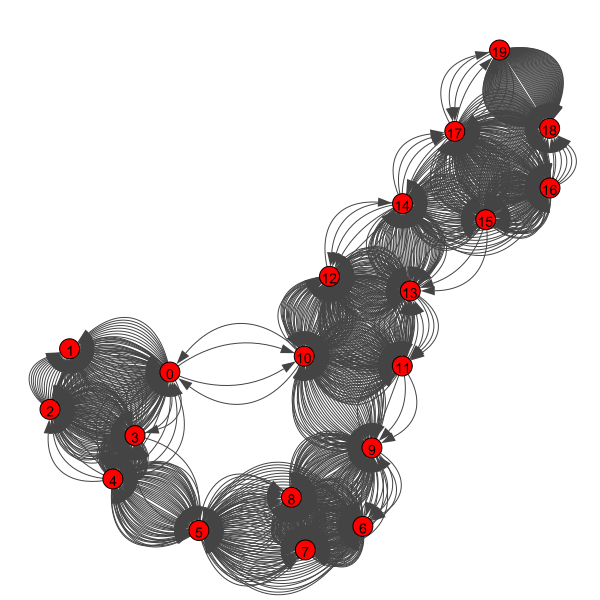

In [70]:
import pandas as pd
from igraph import Graph, plot
import matplotlib.pyplot as plt
import numpy as np

# Load data from CSV
transactions = pd.read_csv('TRANSACTION1.csv', sep=';')
df = transactions[(transactions['FromAccountId'] != 0) | (transactions['ToAccountId'] != 0)].copy()

# Extract unique participant IDs
participants = pd.DataFrame({
    'id': pd.concat([df['FromParticipantId'], df['ToParticipantId']]).unique()
})

# Create a graph with participants as nodes
g = Graph(directed=True)
g.add_vertices(participants['id'].astype(str))

# Add edges for each transaction
for _, row in df.iterrows():
    g.add_edge(str(row['FromParticipantId']), str(row['ToParticipantId']))

# Calculate in-degree and out-degree for each participant
in_degree = g.indegree()
out_degree = g.outdegree()

# Print results
for v in g.vs:
    print(f"Participant {v['name']} - In-degree: {in_degree[v.index]}, Out-degree: {out_degree[v.index]}")

# Visualize the graph
layout = g.layout('kk')  # Kamada-Kawai layout
visual_style = {
    "vertex_size": 20,
    "vertex_label": g.vs['name'],
    "edge_width": [1 for _ in g.es],  # Uniform edge width as weights are not considered
    "layout": layout,
    "bbox": (600, 600),
    "margin": 50
}
plot(g, **visual_style)


# edge = total value
### degree en visual klopt niet altijd zo te zien

DataFrame has been written to 'df_output.csv'
Empty DataFrame
Columns: [FromParticipantId, ToParticipantId, Value]
Index: []
Participant 11 - In-degree: 4, Out-degree: 4
Participant 15 - In-degree: 4, Out-degree: 5
Participant 16 - In-degree: 3, Out-degree: 4
Participant 3 - In-degree: 4, Out-degree: 4
Participant 9 - In-degree: 5, Out-degree: 5
Participant 8 - In-degree: 4, Out-degree: 4
Participant 2 - In-degree: 3, Out-degree: 2
Participant 10 - In-degree: 5, Out-degree: 3
Participant 19 - In-degree: 1, Out-degree: 2
Participant 5 - In-degree: 5, Out-degree: 5
Participant 13 - In-degree: 4, Out-degree: 5
Participant 4 - In-degree: 3, Out-degree: 3
Participant 12 - In-degree: 4, Out-degree: 4
Participant 7 - In-degree: 4, Out-degree: 4
Participant 14 - In-degree: 5, Out-degree: 5
Participant 0 - In-degree: 0, Out-degree: 5
Participant 6 - In-degree: 4, Out-degree: 4
Participant 17 - In-degree: 4, Out-degree: 5
Participant 1 - In-degree: 3, Out-degree: 0
Participant 18 - In-degree: 4,

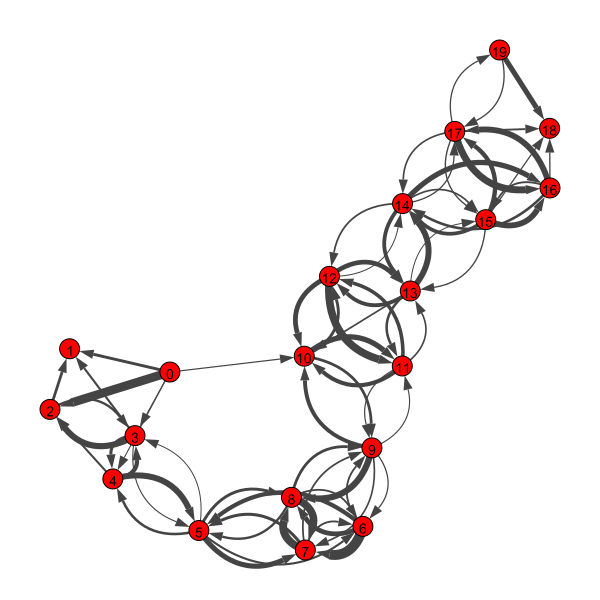

In [71]:
import pandas as pd
from igraph import Graph, plot
import numpy as np

# Load data from CSV
transactions = pd.read_csv('TRANSACTION1.csv', sep=';')
df = transactions[(transactions['FromAccountId'] != 0) | (transactions['ToAccountId'] != 0)].copy()

# Convert IDs to string right after filtering to maintain consistency
df['FromParticipantId'] = df['FromParticipantId'].astype(int).astype(str)
df['ToParticipantId'] = df['ToParticipantId'].astype(int).astype(str)

# Aggregate transaction values by pairs
transaction_sums = df.pivot_table(index=['FromParticipantId', 'ToParticipantId'], values='Value', aggfunc='sum').reset_index()
# Write DataFrame to a text file
transaction_sums.to_csv('df_output.csv', index=False) # Hier zit de fout niet

# Print confirmation message
print("DataFrame has been written to 'df_output.csv'")
filtered_transactions = transaction_sums[(transaction_sums['FromParticipantId'] == 18) & (transaction_sums['ToParticipantId'] == 19)]
print(filtered_transactions)
# Extract unique participant IDs and ensure they are strings
participants = pd.DataFrame({
    'id': pd.concat([df['FromParticipantId'], df['ToParticipantId']]).unique()
})

# Create a graph with participants as nodes, ensuring all are strings
g = Graph(directed=True)
g.add_vertices(participants['id'].tolist())

# Add aggregated edges, ensuring consistency in string usage
for _, row in transaction_sums.iterrows():
    try:
        if row['Value'] != 0:
            g.add_edge(row['FromParticipantId'], row['ToParticipantId'], weight=row['Value'])
    except ValueError as e:
        print(f"Error adding edge from {row['FromParticipantId']} to {row['ToParticipantId']}: {e}")

# Calculate in-degree and out-degree for each participant
in_degree = g.indegree()
out_degree = g.outdegree()

# Print results
for v in g.vs:
    print(f"Participant {v['name']} - In-degree: {in_degree[v.index]}, Out-degree: {out_degree[v.index]}")


# Normalize edge weights for visualization
weights = np.array(g.es["weight"])
normalized_weights = 1 + 9 * (weights - weights.min()) / (weights.max() - weights.min())

# Visualize the graph
layout = g.layout('kk')  # Kamada-Kawai layout
visual_style = {
    "vertex_size": 20,
    "vertex_label": g.vs['name'],
    "edge_width": normalized_weights,  # Adjust edge width scaling as needed
    "layout": layout,
    "bbox": (600, 600),
    "margin": 50
}
plot(g, **visual_style)


## Basic Analysis


In [35]:
#print basic network statistics
betw=g.betweenness()
print(betw)
degree=g.degree()
print(degree)
closeness=g.closeness()
print(closeness)
pagerank=g.pagerank()
print(pagerank)
avg_path=g.average_path_length()
print(avg_path)
clustering_coeff=g.transitivity_undirected()
print(clustering_coeff)

[84.89999999999999, 33.03333333333333, 0.9833333333333334, 39.0, 143.0, 31.33333333333334, 0.5, 55.16666666666667, 0.0, 96.0, 77.05, 8.5, 47.266666666666666, 31.33333333333334, 60.61666666666666, 0.0, 31.33333333333334, 32.98333333333333, 0.0, 0.0]
[8, 9, 7, 8, 10, 8, 5, 8, 3, 10, 9, 6, 8, 8, 10, 5, 8, 9, 3, 4]
[0.4318181818181818, 0.36538461538461536, 0.2923076923076923, 0.35185185185185186, 0.3958333333333333, 0.3392857142857143, 0.3275862068965517, 0.48717948717948717, 0.2345679012345679, 0.3064516129032258, 0.4418604651162791, 0.34545454545454546, 0.4222222222222222, 0.3392857142857143, 0.36538461538461536, 0.40425531914893614, 0.3392857142857143, 0.296875, 0.3220338983050847, 0.2878787878787879]
[0.06536155602652981, 0.04427362138521027, 0.03505509608239851, 0.04921420026876719, 0.08421920689722422, 0.06527443185168334, 0.03317281668316605, 0.06318651828111975, 0.01810866701441606, 0.07294678854334459, 0.05468137071051663, 0.035512029144572445, 0.06132250304506061, 0.0652744318516

### Degree Distribution

Text(0.5, 1.0, 'Degree distribution')

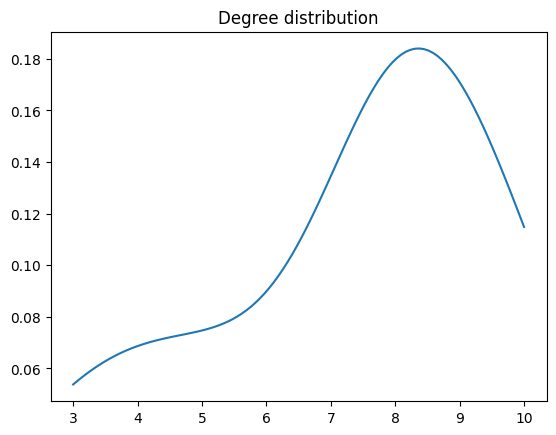

In [36]:
# Estimation of the probability denstity function using a kernel-density estimation using Gaussian kernel
kde = gaussian_kde(degree)
# these are the values over wich your kernel will be evaluated
dist_space = linspace( min(degree), max(degree), 100 )
# plot the results
plt.plot( dist_space, kde(dist_space) )
plt.title("Degree distribution")

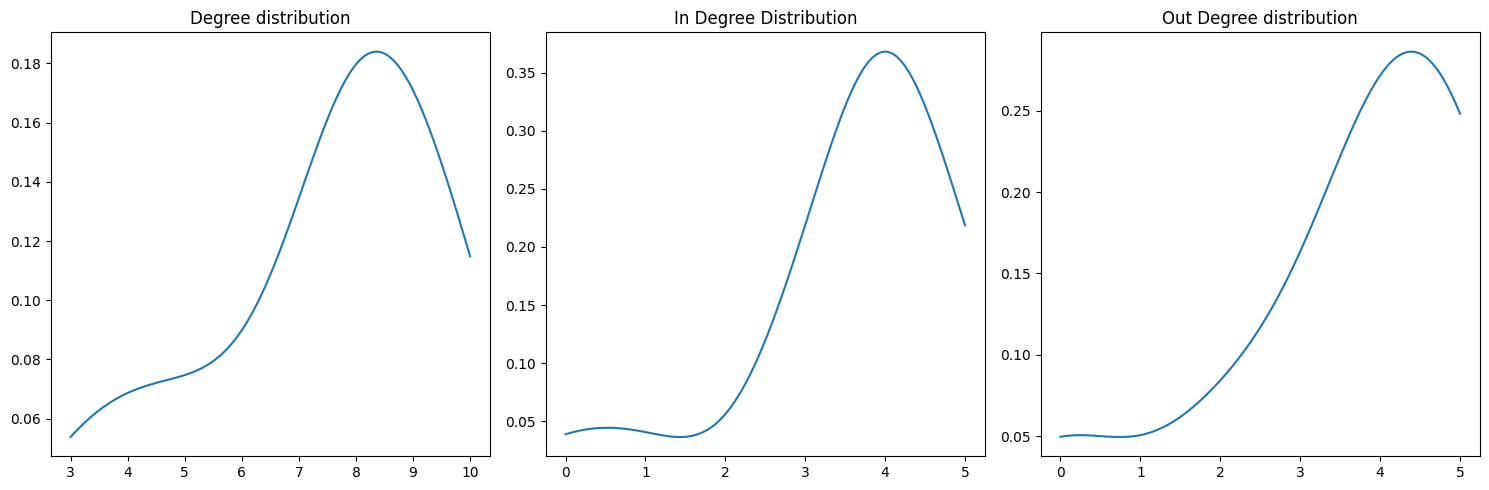

In [37]:
# Create a figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# Plot 1: Degree distribution
degree=g.degree()
kde = gaussian_kde(degree)
dist_space = linspace( min(degree), max(degree), 100 )
axes[0].plot(dist_space, kde(dist_space))
axes[0].set_title("Degree distribution")

# Plot 2: In degree distribution
in_degree=g.indegree()
kde = gaussian_kde(in_degree)
dist_space = linspace( min(in_degree), max(in_degree), 100 )
axes[1].plot(dist_space, kde(dist_space))
axes[1].set_title("In Degree Distribution")

# Plot 3: Out Degree distribution
out_degree=g.outdegree()
kde = gaussian_kde(out_degree)
dist_space = linspace( min(out_degree), max(out_degree), 100 )
axes[2].plot(dist_space, kde(dist_space))
axes[2].set_title("Out Degree distribution")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### Betweenness Distribution

Text(0.5, 1.0, 'Betweenness distribution')

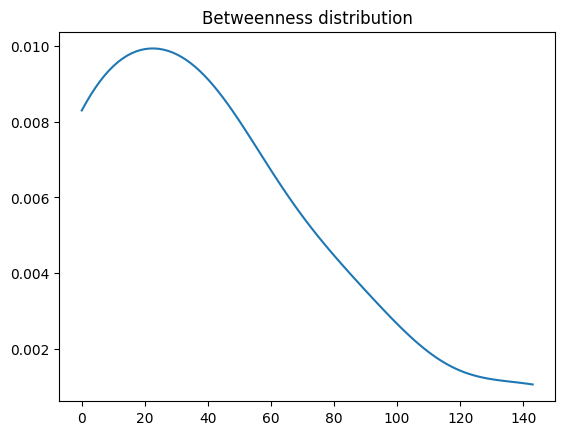

In [38]:
# Estimation of the probability denstity function using a kernel-density estimation using Gaussian kernel
btw=g.betweenness()
kde = gaussian_kde(btw)
# these are the values over wich your kernel will be evaluated
dist_space = linspace( min(btw), max(btw), 100 )
# plot the results
plt.plot( dist_space, kde(dist_space) )
plt.title("Betweenness distribution")

In [72]:
# Find nodes with the highest degree
max_degree_value = max(degree)
max_degree_nodes = [node for node, node_degree in enumerate(degree) if node_degree == max_degree_value]
max_degree_nodes_labels = [g.vs[node]["name"] for node in list(max_degree_nodes)]
max_degree_nodes_id = [g.vs[node]["name"] for node in list(max_degree_nodes)]


# Find nodes with the highest betweenness
max_betweenness_value = max(btw)
max_betweenness_nodes = [node for node, betweenness in enumerate(btw) if betweenness == max_betweenness_value]
max_betweenness_nodes_labels = [g.vs[node]["name"] for node in list(max_betweenness_nodes)]
max_betweenness_nodes_id = [g.vs[node]["name"] for node in list(max_betweenness_nodes)]


print(f"Nodes with the highest degree: {max_degree_nodes_labels} (Degree: {max_degree_value})")
print(f"Nodes with the highest betweenness: {max_betweenness_nodes_labels} (Betweenness: {max_betweenness_value})")

Nodes with the highest degree: ['9', '5', '14'] (Degree: 10)
Nodes with the highest betweenness: ['9'] (Betweenness: 143.0)


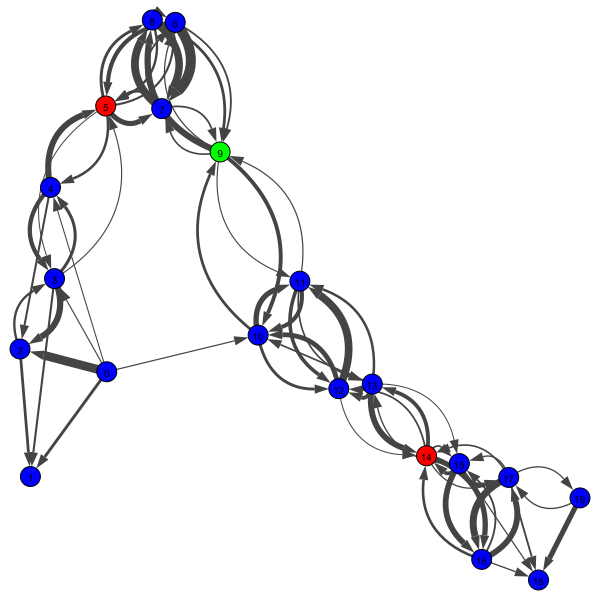

In [73]:
#visual with the nodes with the highest betweenness in yellow
# Normalize edge weights for visualization
weights = np.array(g.es["weight"])
normalized_weights = 1 + 9 * (weights - weights.min()) / (weights.max() - weights.min())
# Create plot using Fruchterman-Rheingold
layout_fr = g.layout("fr")

visual_style = {}
visual_style["vertex_size"] = 20
visual_style["vertex_label_size"]=10
visual_style["vertex_color"] = "blue"
visual_style["vertex_label"] = g.vs["name"]
visual_style["layout"] = layout_fr
visual_style["edge_width"]=normalized_weights
visual_style["bbox"] = (600, 600)
visual_style["margin"] = 20

#give a different colour to the nodes with the highest betweenness, and highest degree
g.vs['color']='blue'
for i in max_betweenness_nodes:
  g.vs[i]['color']='yellow'
for i in max_degree_nodes:
  g.vs[i]['color']='red'
for i in max_degree_nodes and max_betweenness_nodes:
  g.vs[i]['color']='green'

visual_style["vertex_color"] = g.vs['color']


ig.plot(g, **visual_style)

number of nodes removed: 3


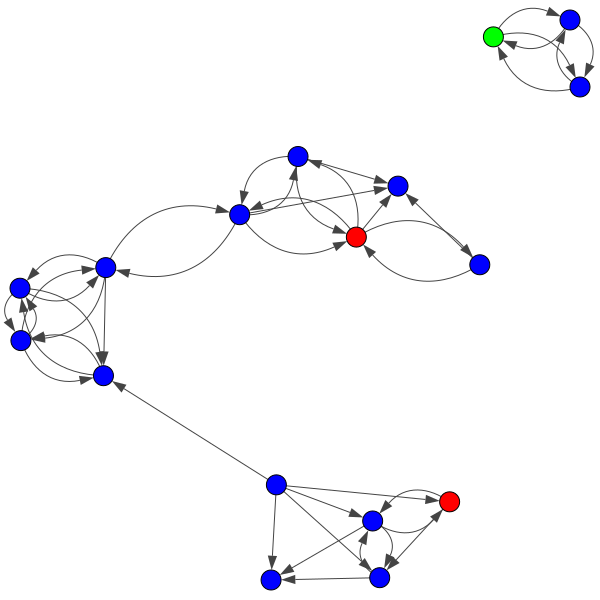

In [89]:
#run this cell to remove the nodes with the highest degree
#it takes a few iterations with deletion of nodes before the network starts to collapse

max_degree_nodes = [node for node, node_degree in enumerate(g.degree()) if node_degree == max(g.degree())]
g.delete_vertices(max_degree_nodes)
print("number of nodes removed:", len(max_degree_nodes))

weights = np.array(g.es["weight"])
normalized_weights = 1 + 9 * (weights - weights.min()) / (weights.max() - weights.min())
# Create plot using Fruchterman-Rheingold
layout_fr = g.layout("fr")

visual_style = {}
visual_style["vertex_size"] = 20
visual_style["vertex_label_size"]=10
visual_style["vertex_color"] = "blue"
visual_style["vertex_label"] = g.vs["name"]
visual_style["layout"] = layout_fr
visual_style["edge_width"]=normalized_weights
visual_style["bbox"] = (600, 600)
visual_style["margin"] = 20

#give a different colour to the nodes with the highest betweenness, and highest degree
g.vs['color']='blue'
for i in max_betweenness_nodes:
  g.vs[i]['color']='yellow'
for i in max_degree_nodes:
  g.vs[i]['color']='red'
for i in max_degree_nodes and max_betweenness_nodes:
  g.vs[i]['color']='green'

visual_style["vertex_color"] = g.vs['color']
ig.plot(g)

In [88]:
# Load data from CSV
transactions = pd.read_csv('TRANSACTION1.csv', sep=';')
df = transactions[(transactions['FromAccountId'] != 0) | (transactions['ToAccountId'] != 0)].copy()

# Convert IDs to string right after filtering to maintain consistency
df['FromParticipantId'] = df['FromParticipantId'].astype(int).astype(str)
df['ToParticipantId'] = df['ToParticipantId'].astype(int).astype(str)

# Aggregate transaction values by pairs
transaction_sums = df.pivot_table(index=['FromParticipantId', 'ToParticipantId'], values='Value', aggfunc='sum').reset_index()
# Write DataFrame to a text file
transaction_sums.to_csv('df_output.csv', index=False) # Hier zit de fout niet

# Print confirmation message
print("DataFrame has been written to 'df_output.csv'")
filtered_transactions = transaction_sums[(transaction_sums['FromParticipantId'] == 18) & (transaction_sums['ToParticipantId'] == 19)]
print(filtered_transactions)
# Extract unique participant IDs and ensure they are strings
participants = pd.DataFrame({
    'id': pd.concat([df['FromParticipantId'], df['ToParticipantId']]).unique()
})

# Create a graph with participants as nodes, ensuring all are strings
g = Graph(directed=True)
g.add_vertices(participants['id'].tolist())

# Add aggregated edges, ensuring consistency in string usage
for _, row in transaction_sums.iterrows():
    try:
        if row['Value'] != 0:
            g.add_edge(row['FromParticipantId'], row['ToParticipantId'], weight=row['Value'])
    except ValueError as e:
        print(f"Error adding edge from {row['FromParticipantId']} to {row['ToParticipantId']}: {e}")

DataFrame has been written to 'df_output.csv'
Empty DataFrame
Columns: [FromParticipantId, ToParticipantId, Value]
Index: []


## Community Detection


## Proberen om visual met heatmap te maken maar nog niet gelukt

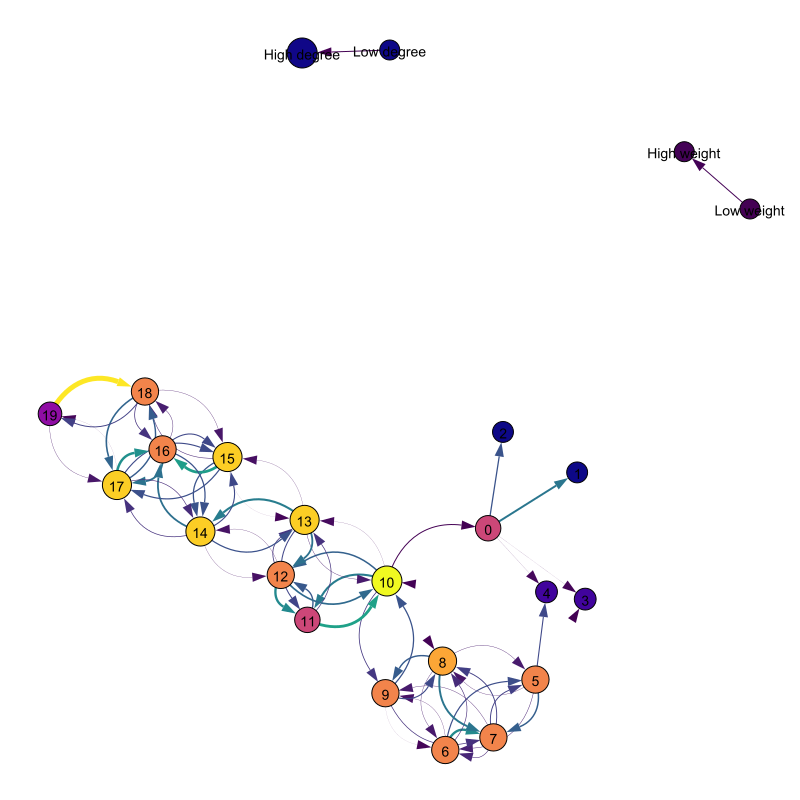

In [73]:
import pandas as pd
from igraph import Graph, plot
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors  # Correct import for color handling

# Load data from CSV
transactions = pd.read_csv('TRANSACTION1.csv', sep=';')
df = transactions[(transactions['FromAccountId'] != 0) | (transactions['ToAccountId'] != 0)].copy()

# Convert IDs to string right after filtering to maintain consistency
df['FromParticipantId'] = df['FromParticipantId'].astype(int).astype(str)
df['ToParticipantId'] = df['ToParticipantId'].astype(int).astype(str)

# Aggregate transaction values by pairs
transaction_sums = df.groupby(['FromParticipantId', 'ToParticipantId']).agg({
    'Value': 'sum'
}).reset_index()

# Extract unique participant IDs and ensure they are strings
participants = pd.DataFrame({
    'id': pd.concat([df['FromParticipantId'], df['ToParticipantId']]).unique()
})

# Create a graph with participants as nodes, ensuring all are strings
g = Graph(directed=True)
g.add_vertices(participants['id'].tolist())

# Add aggregated edges, ensuring consistency in string usage
for _, row in transaction_sums.iterrows():
    g.add_edge(row['FromParticipantId'], row['ToParticipantId'], weight=row['Value'])

# Calculate degrees for vertex size and color scaling
degrees = g.degree()
max_degree = max(degrees)
vertex_sizes = [20 + 10 * (deg / max_degree) for deg in degrees]
degree_normalized = (np.array(degrees) - min(degrees)) / (max(degrees) - min(degrees))

# Normalize edge weights for visualization
weights = np.array(g.es["weight"])
normalized_weights = (weights - weights.min()) / (weights.max() - weights.min())
edge_colors = plt.cm.viridis(normalized_weights)
vertex_colors = plt.cm.plasma(degree_normalized)

# Convert color arrays to hex codes or tuples
edge_colors = [mcolors.rgb2hex(color) for color in edge_colors]
vertex_colors = [mcolors.rgb2hex(color) for color in vertex_colors]

# Adding legend elements
legend_vertices = ['Low degree', 'High degree', 'Low weight', 'High weight']
g.add_vertices(legend_vertices)
legend_colors = [mcolors.rgb2hex(plt.cm.plasma(0)), mcolors.rgb2hex(plt.cm.plasma(1)),
                 mcolors.rgb2hex(plt.cm.viridis(0)), mcolors.rgb2hex(plt.cm.viridis(1))]
legend_sizes = [20, 30, 20, 20]
legend_edges = [(legend_vertices[0], legend_vertices[1]), (legend_vertices[2], legend_vertices[3])]
g.add_edges(legend_edges)
edge_indices = [g.get_eid(legend_vertices[0], legend_vertices[1]), g.get_eid(legend_vertices[2], legend_vertices[3])]
for i in edge_indices:
    g.es[i]['width'] = 1

# Update visual style for the legend
visual_style = {
    "vertex_size": vertex_sizes + legend_sizes,
    "vertex_color": vertex_colors + legend_colors,
    "vertex_label": list(g.vs['name']) + legend_vertices,
    "edge_width": list(normalized_weights * 5) + [1, 1],  # Ensure correct list length and type
    "edge_color": list(edge_colors) + [mcolors.rgb2hex(plt.cm.viridis(0)), mcolors.rgb2hex(plt.cm.viridis(1))],
    "layout": g.layout('kk'),  # Kamada-Kawai layout
    "bbox": (800, 800),  # Increased the bounding box size
    "margin": 50
}

plot(g, **visual_style)
